# Import Library

In [9]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Load & EDA

In [10]:
attrition = pd.read_csv('/content/HR_Employee_Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

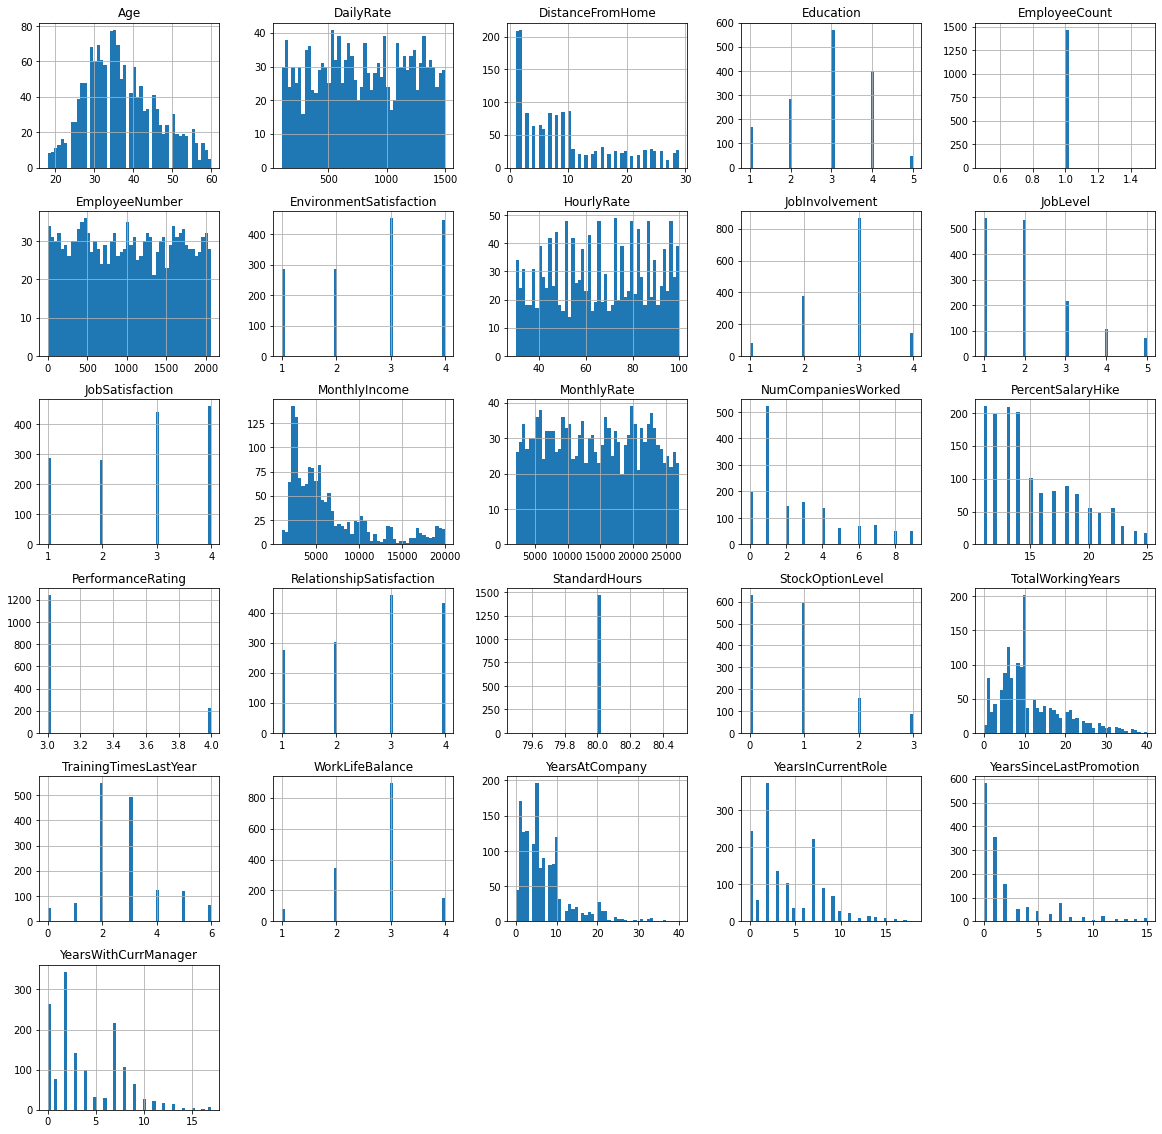

In [12]:
attrition.hist(bins = 50, figsize = (20,20))
plt.show()

결측치 확인

In [13]:
attrition.isnull().sum()
# 결측치 없음

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

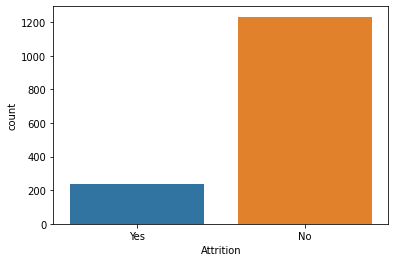

In [14]:
# Attrition 분포 확인
sns.countplot(x='Attrition', data=attrition)

In [15]:
# column 각각의 unique한 값들의 개수 출력
for column in attrition.columns:
    print(f"{column}: Number of unique values {attrition[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [17]:
# data type이 object인 column들의 유니크한 값 확인 및 리스트 생성
object_col_list = []
for column in attrition.columns:
    if attrition[column].dtype == object and attrition[column].nunique()!=1:
        object_col_list.append(column)
        print(f"{column} : {attrition[column].unique()}")

# y값으로 사용될 Attrition 제거
object_col_list.remove('Attrition')

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [18]:
#data type이 int인 column들의 유니크한 값 확인 및 리스트 생성
int_col_list=[]
for col in attrition.columns:
  if attrition[col].dtypes=='int64' and attrition[col].nunique()!=1:
    int_col_list.append(col)

#직원 ID는 개인의 고유한 값이기 때문에 제거
int_col_list.remove('EmployeeNumber')

이상치 확인

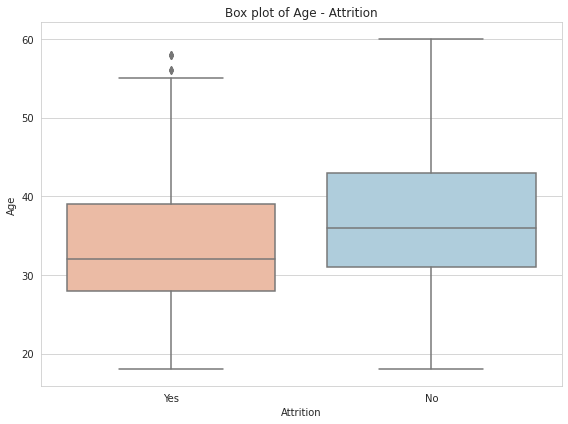

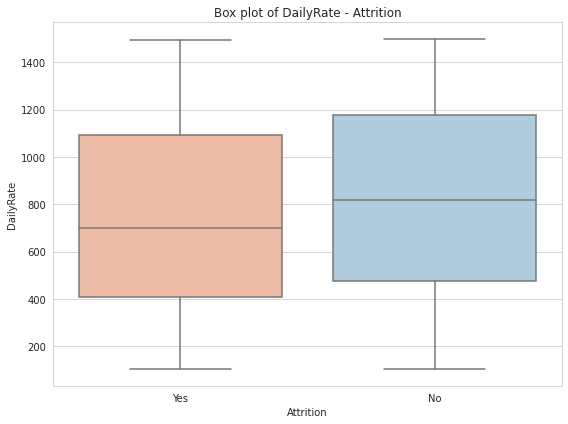

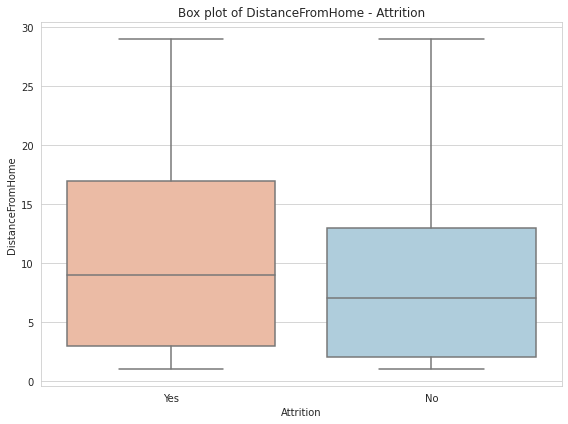

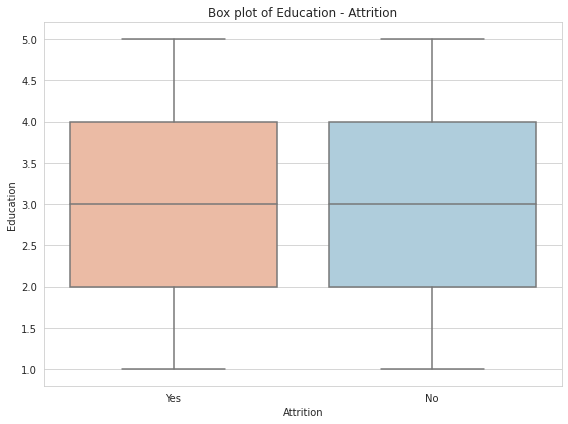

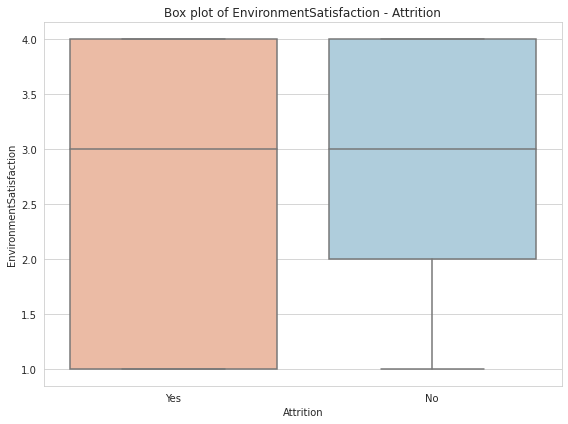

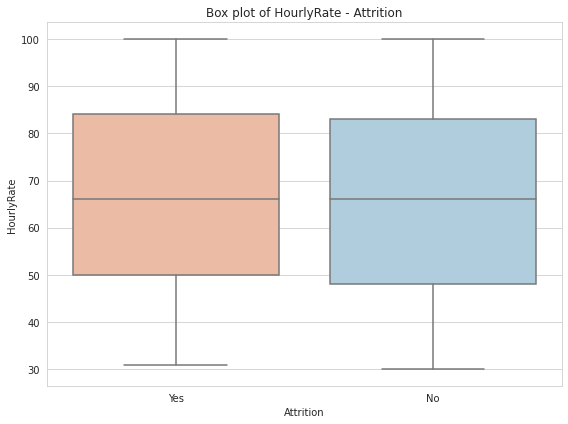

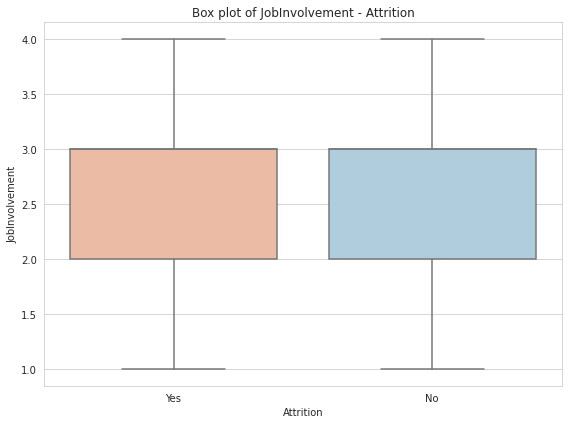

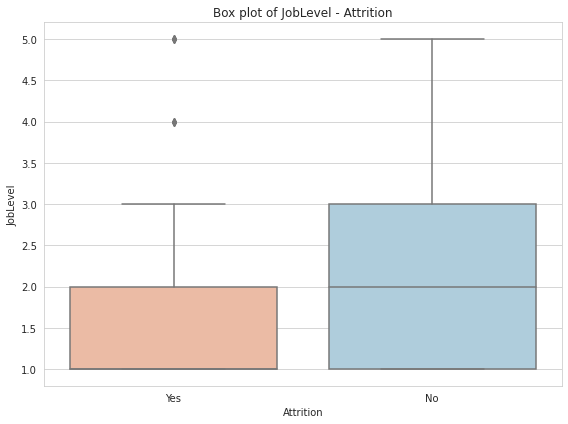

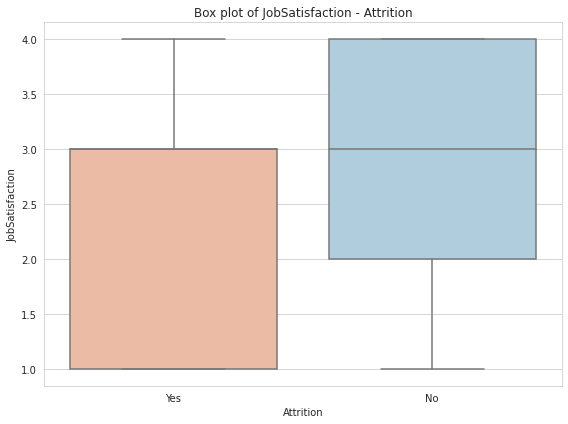

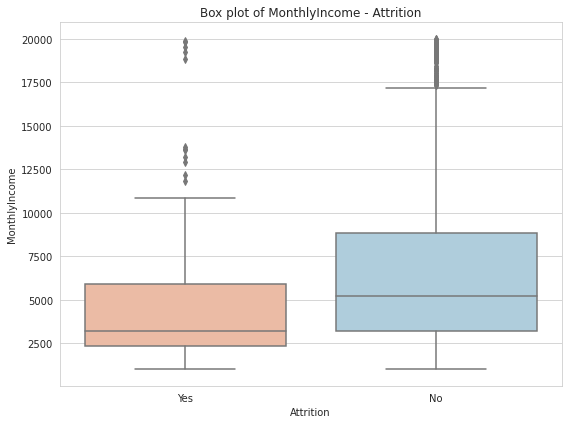

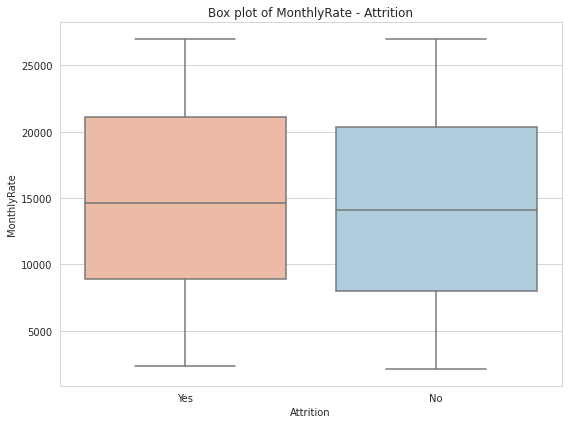

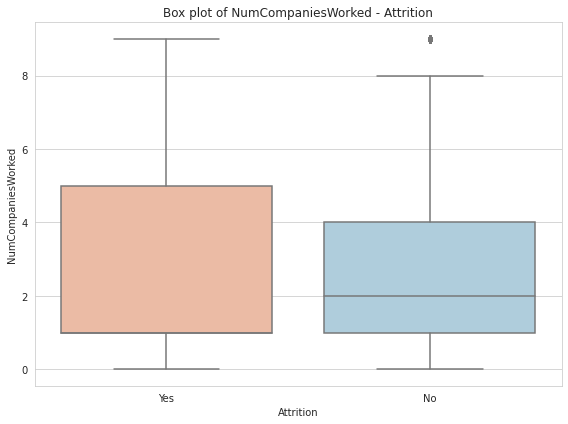

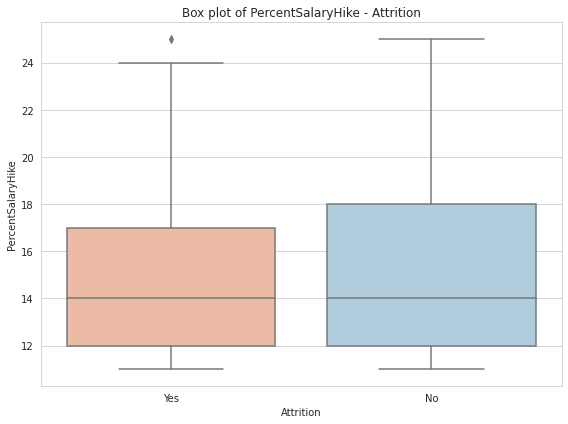

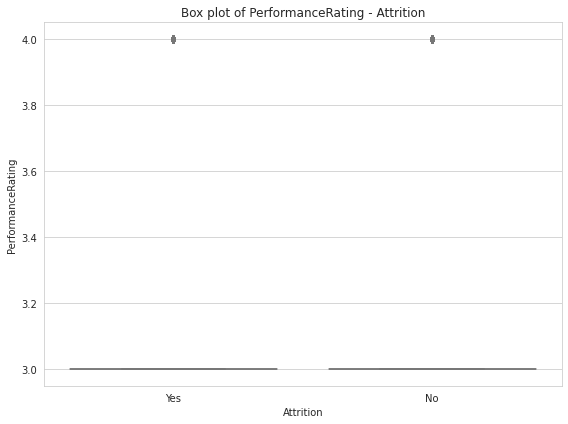

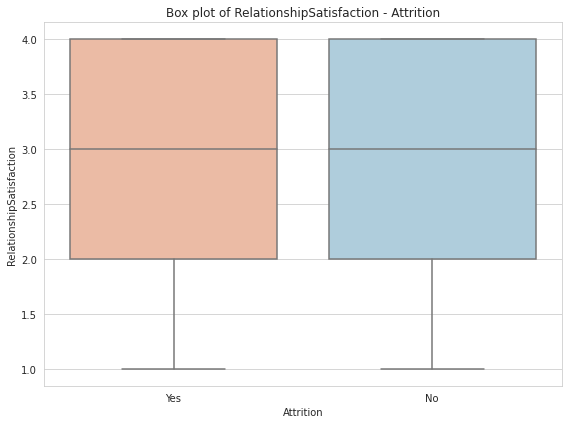

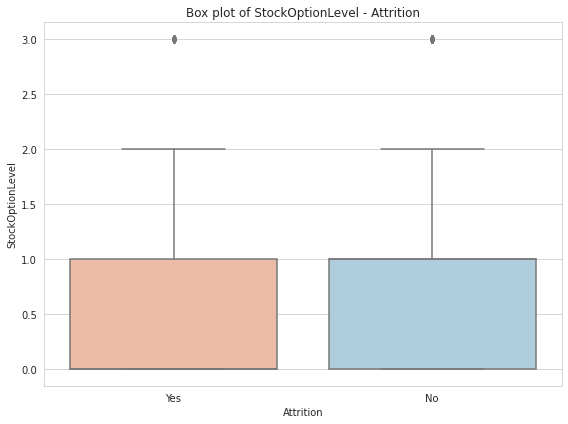

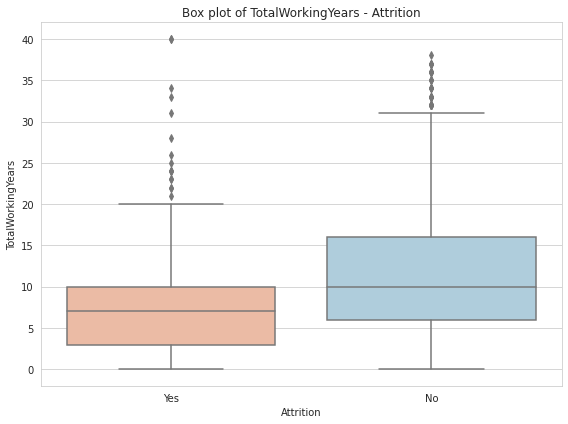

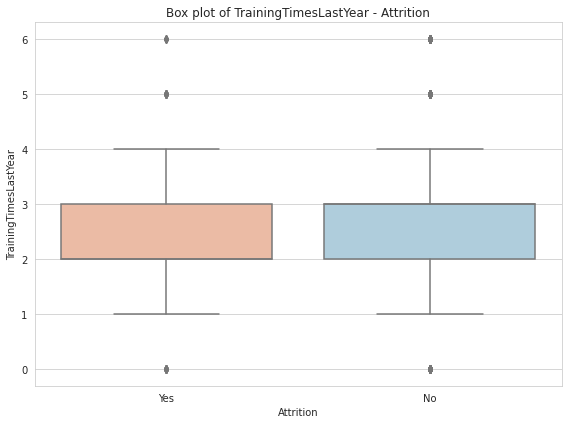

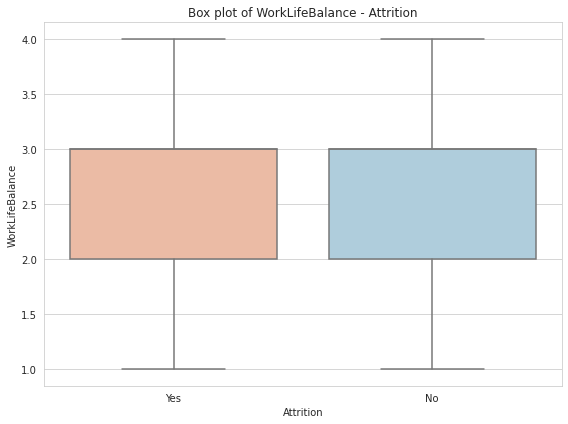

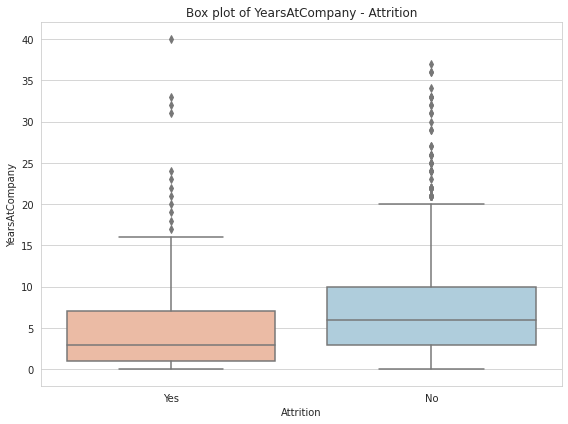

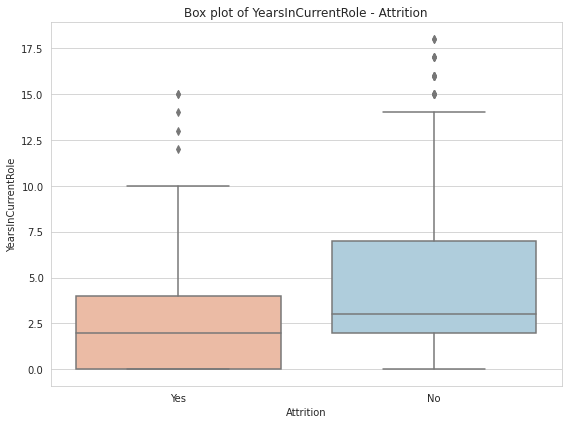

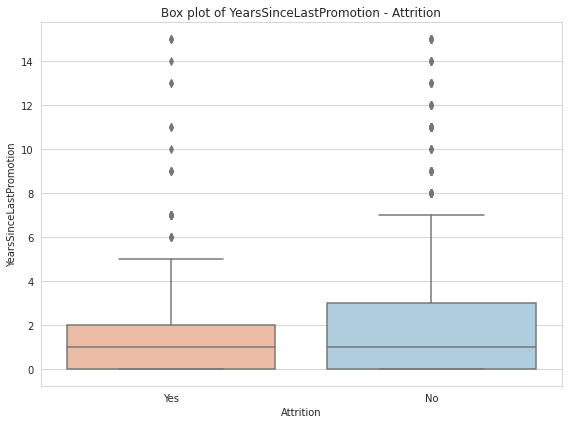

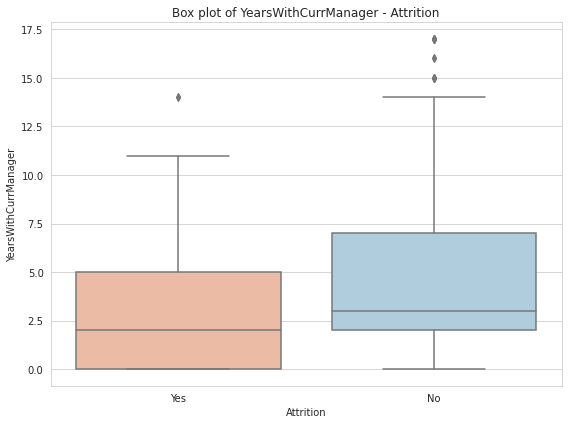

In [21]:
for c in int_col_list:
  fig=plt.figure(figsize=(8,6))
  sns.set_style('whitegrid')
  sns.boxplot(x = 'Attrition', y = c, data=attrition,  palette = "RdBu").set(title='Box plot of '+c + ' - Attrition')
  fig.tight_layout()

시각화

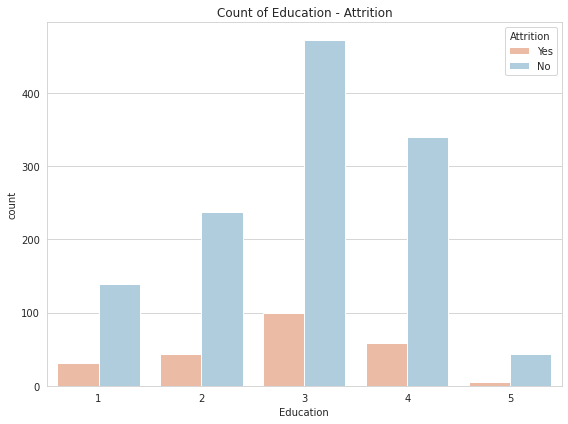

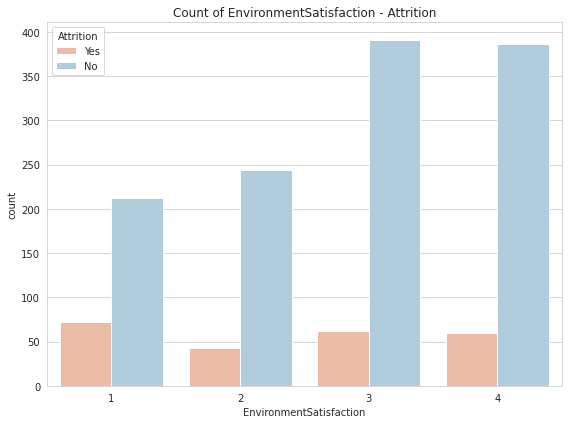

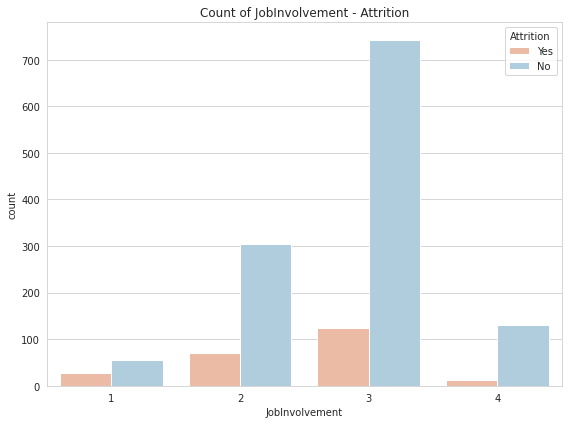

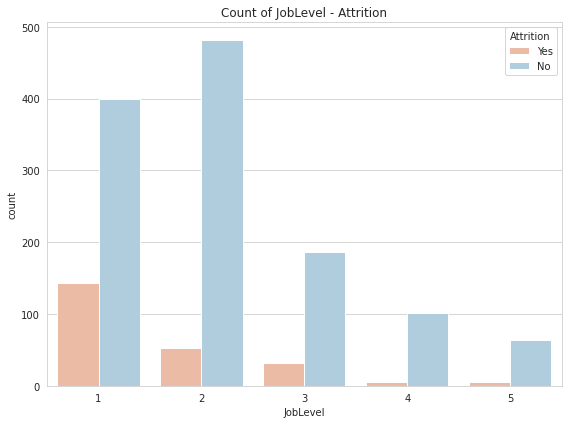

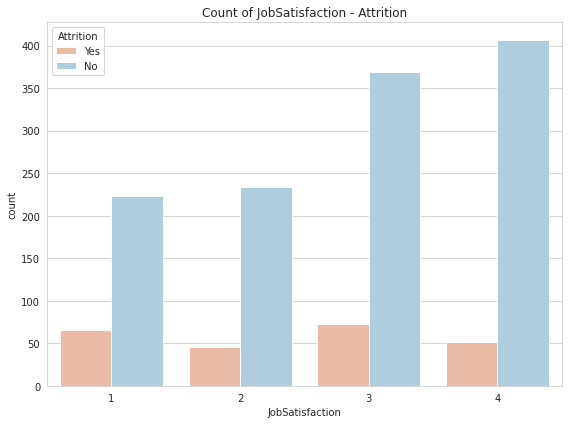

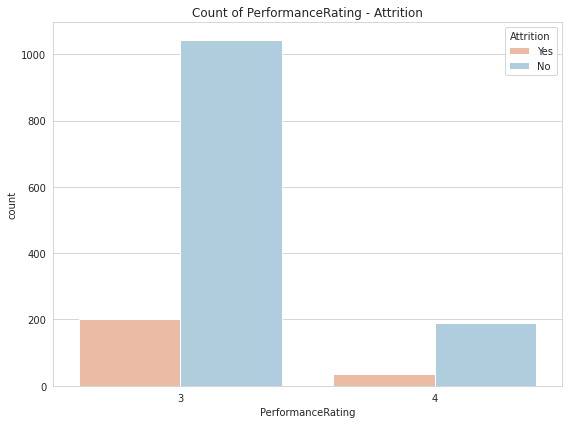

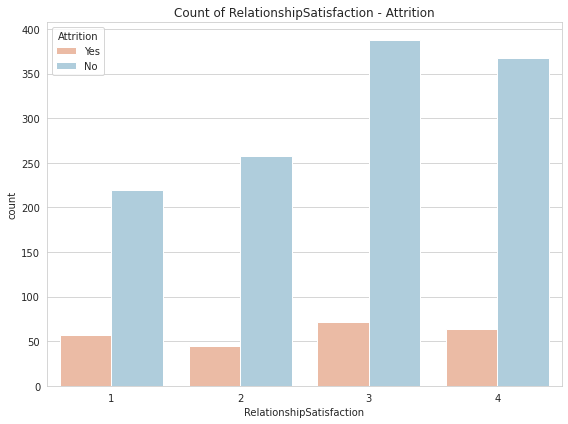

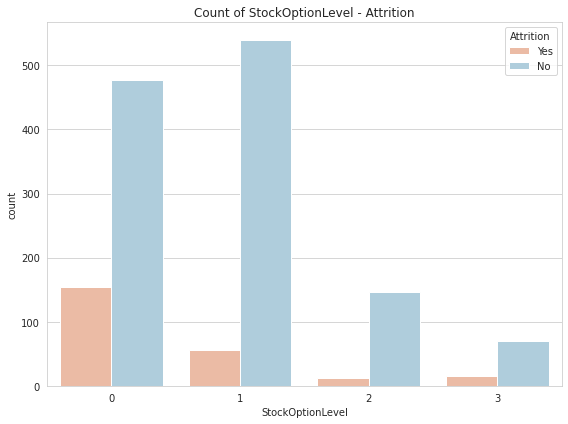

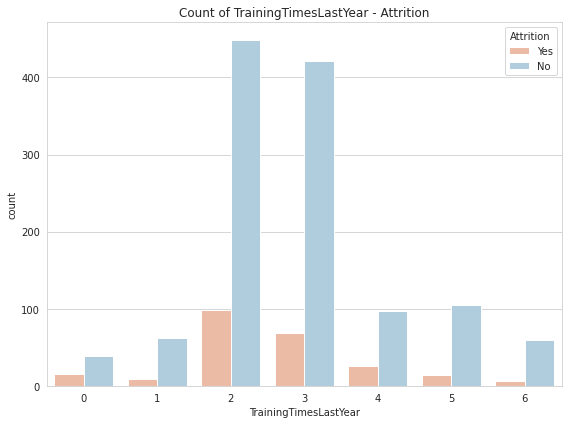

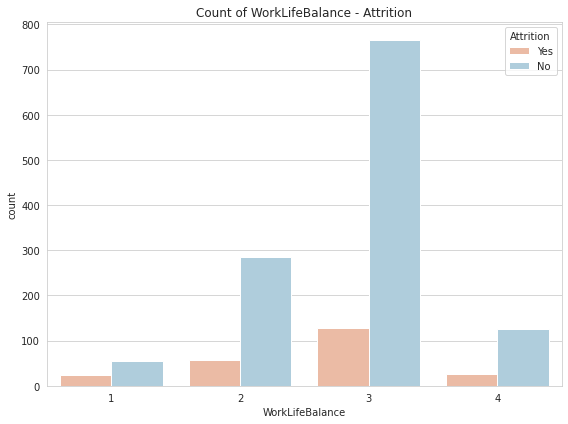

In [22]:
for c in int_col_list:
  if attrition[c].nunique()<10:
    fig=plt.figure(figsize=(8,6))
    sns.set_style('whitegrid')
    sns.countplot(x = c, data=attrition,  palette = "RdBu", hue='Attrition').set(title='Count of '+c+ ' - Attrition')
    fig.tight_layout()

In [23]:
y_att=attrition[attrition['Attrition']=='Yes']
n_att=attrition[attrition['Attrition']=='No']

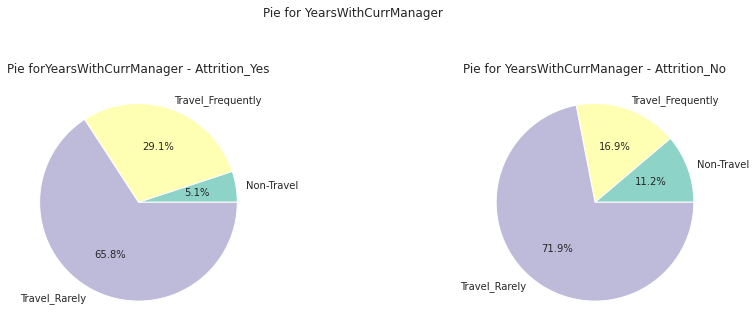

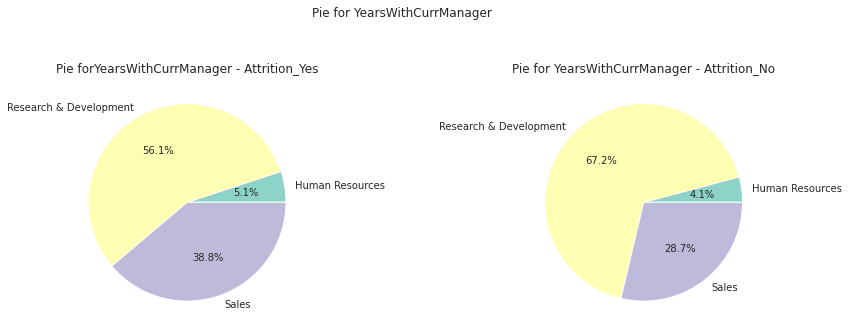

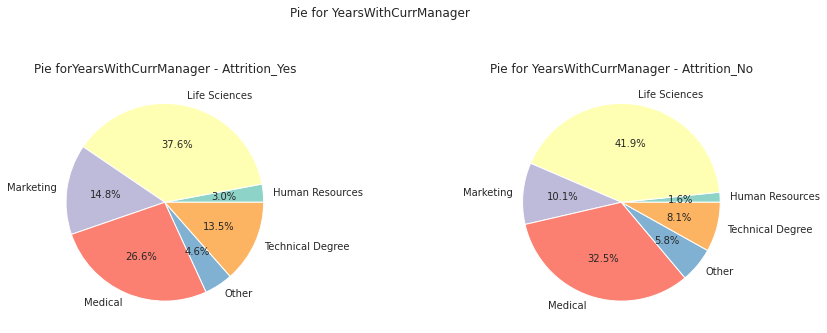

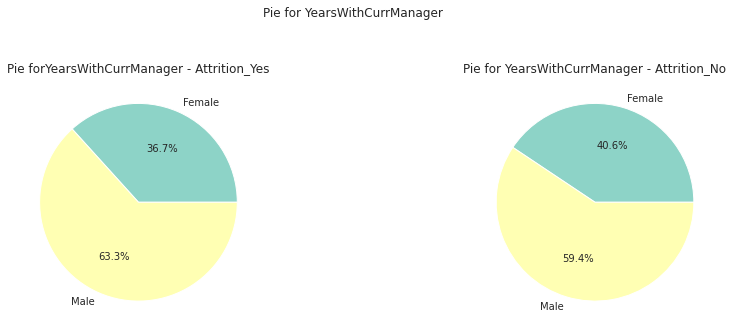

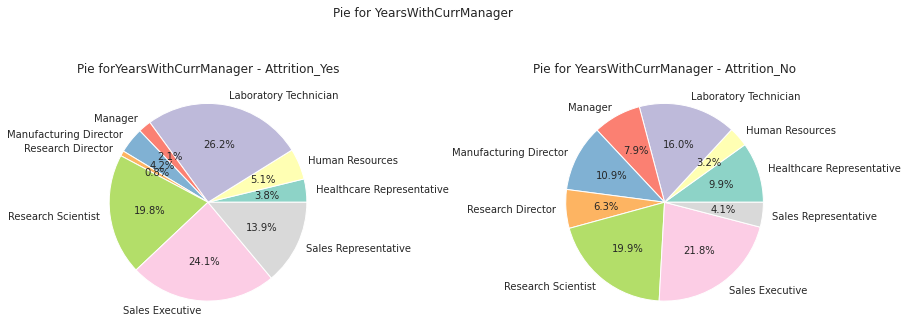

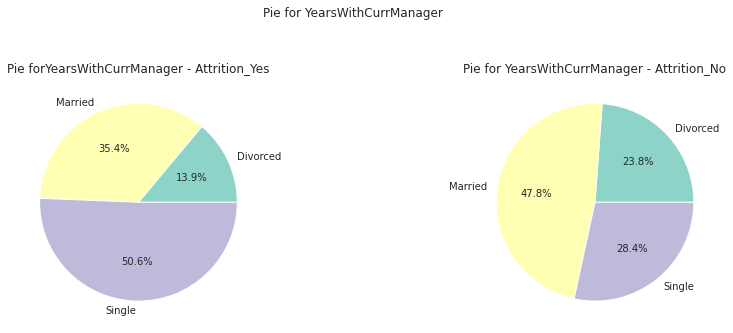

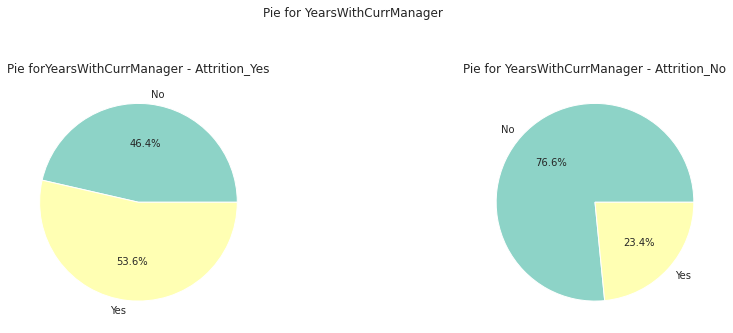

In [24]:
color = sns.color_palette("Set3", 10)

for col in object_col_list:
  plt.figure(1, figsize=(15,10))
  the_grid = GridSpec(2, 2)
  y_values, n_values=y_att.groupby(col)['Attrition'].count().values, n_att.groupby(col)['Attrition'].count().values
  y_index, n_index=y_att.groupby(col)['Attrition'].count().index, n_att.groupby(col)['Attrition'].count().index
  plt.subplot(the_grid[0, 0], aspect=1, title='Pie for'+ c +' - Attrition_Yes')
  a=plt.pie(y_values, labels=y_index, colors=color,autopct='%.1f%%')
  plt.subplot(the_grid[0, 1], aspect=1, title='Pie for '+c+' - Attrition_No')
  b=plt.pie(n_values, labels=n_index, colors=color,autopct='%.1f%%')
  plt.suptitle('Pie for '+c)
  plt.show()

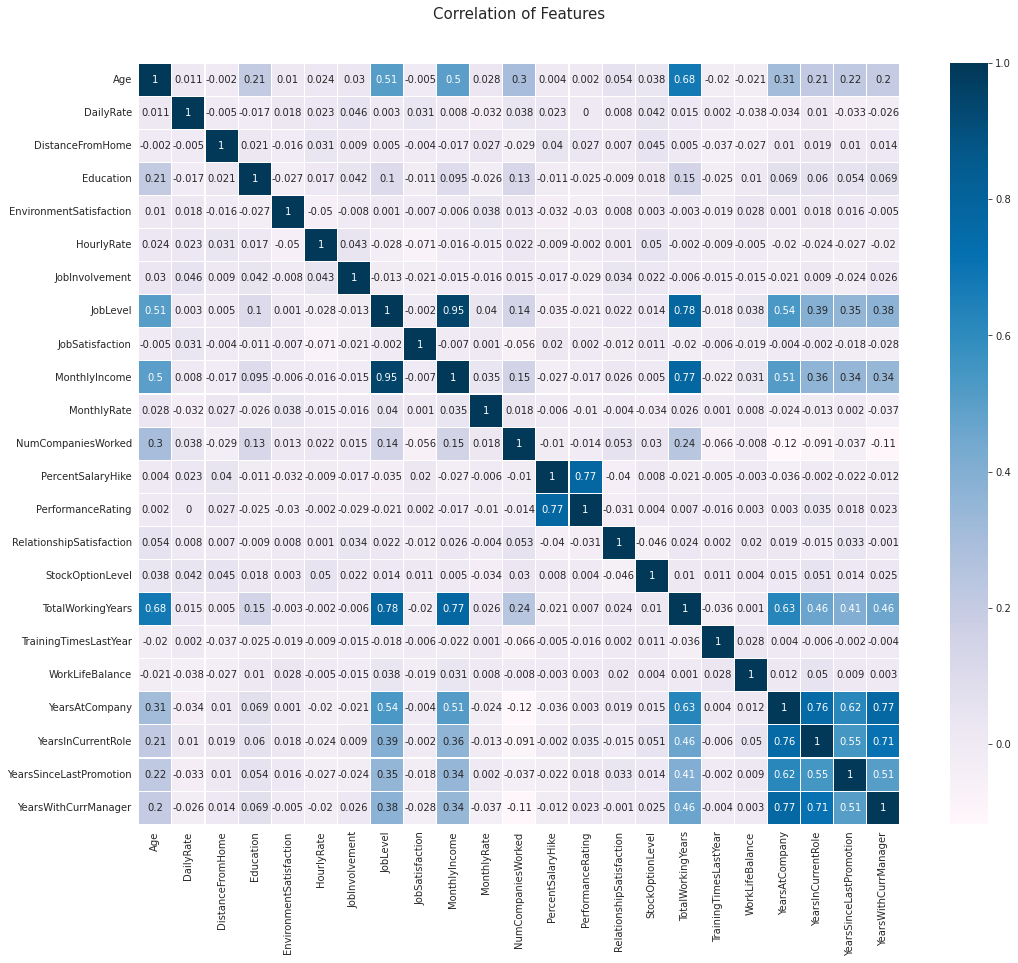

In [25]:
corr_att=attrition.loc[:,int_col_list].corr()
corr_att = corr_att.apply(lambda x: round(x ,3))
colormap = plt.cm.PuBu
plt.figure(figsize=(18, 14))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(corr_att, linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

파생 변수 생성

In [26]:
# 직장에서의 전체적인 만족도
TotalSatisfaction = (attrition['RelationshipSatisfaction'] + attrition['JobSatisfaction'] + attrition['EnvironmentSatisfaction'])/3
attrition['TotalSatisfaction'] = TotalSatisfaction

In [27]:
# 총 경력 중 해당 회사에서의 근속 연수
YearsAtCompanyRatio = attrition['YearsAtCompany']/attrition['TotalWorkingYears']
attrition['YearsAtCompanyRatio']=YearsAtCompanyRatio